In [5]:
!pip install datasets --user

  Using cached datasets-2.20.0-py3-none-any.whl.metadata (19 kB)
  Using cached aiohttp-3.9.5-cp312-cp312-win_amd64.whl.metadata (7.7 kB)
Using cached datasets-2.20.0-py3-none-any.whl (547 kB)
Using cached aiohttp-3.9.5-cp312-cp312-win_amd64.whl (369 kB)



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# from datasets import load_dataset
# dataset = load_dataset("uoft-cs/cifar100")

Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt

In [4]:
dataset=pd.read_csv('Tifinagh-version.csv')

In [5]:
dataset.shape

(25739, 785)

In [12]:
train=dataset.iloc[:22500, :]
test=dataset.iloc[22500:, :]

In [14]:
train.shape, test.shape

((22500, 785), (3239, 785))

In [15]:
train

,0,1,0.1,0.2,2,0.3,3,0.4,1.1,1.2,...,0.361,0.362,4.9,0.363,0.364,0.365,0.366,0.367,0.368,0.369
0,0,3,0,1,2,0,0,0,1,0,...,0,1,4,1,0,0,0,0,0,0
1,0,1,0,0,0,2,0,0,1,0,...,0,0,3,1,0,0,0,0,0,0
2,0,0,0,0,0,3,0,0,0,0,...,3,0,0,2,0,0,0,0,0,0
3,0,0,2,0,0,1,0,0,1,0,...,0,1,0,1,0,0,0,0,0,0
4,0,0,1,1,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22495,28,0,1,0,0,0,2,0,0,0,...,0,0,3,1,0,0,0,0,0,0
22496,28,1,0,0,3,0,2,2,0,0,...,0,1,3,0,0,0,0,3,0,2
22497,28,1,0,1,0,1,1,0,1,0,...,2,0,1,0,2,0,3,0,0,0
22498,28,0,0,1,5,3,1,0,0,1,...,0,0,0,0,2,2,0,1,0,0


In [16]:
data_train = np.array(train)
data_test=np.array(test)
m, n = train.shape
np.random.shuffle(data_train) # 
np.random.shuffle(data_test)

In [17]:
data_train.shape

(22500, 785)

In [18]:
print(data_train.shape, data_test.shape)
training_data=data_train.T
testing_data=data_test.T
print(training_data.shape, testing_data.shape)

(22500, 785) (3239, 785)
(785, 22500) (785, 3239)


In [19]:
Y_train=training_data[0]
X_train=training_data[1:n]

In [20]:
Y_train

array([ 7, 21,  0, ...,  1, 17, 15], dtype=int64)

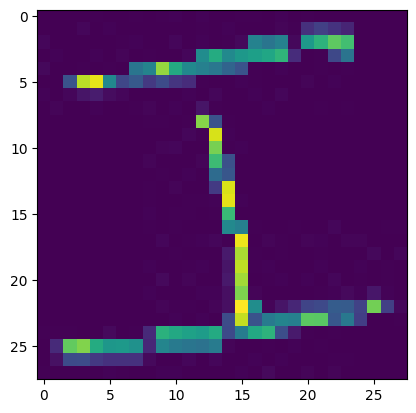

In [21]:
image=X_train[:, 5000].reshape(28,28)
plt.imshow(image)

In [22]:
Y_test=testing_data[0]
X_test=testing_data[1:n]

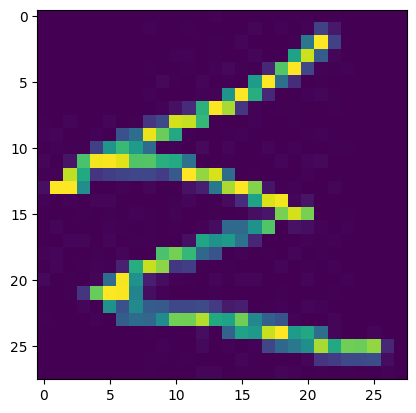

In [23]:
image=X_test[:, 500].reshape(28,28)
plt.imshow(image)

In [24]:
X_train=X_train / 255
X_test=X_test / 255

In [25]:
def tanh(Z):
    tanh_value = np.tanh(Z)
    return tanh_value

def tanh_deriv(Z):
  Y=1-np.power(tanh(Z),2)
  return Y

In [33]:
def xavier_init_params():
    lower_bound = -0.5
    upper_bound = 0.5
    W1=np.random.uniform(lower_bound, upper_bound, (29,784))
    W2=np.random.uniform(lower_bound, upper_bound, (29,29))
    b1=np.random.uniform(lower_bound, upper_bound, (29,1))
    b2=np.random.uniform(lower_bound, upper_bound, (29,1))
    return W1, b1, W2, b2

def init_params():
    W1 = np.random.rand(29, 784) - 0.5
    b1 = np.random.rand(29, 1) - 0.5
    W2 = np.random.rand(29, 29) - 0.5
    b2 = np.random.rand(29, 1) - 0.5
    return W1, b1, W2, b2

def kaiming_init_params():
  np.random.seed(51)
  W1= np.random.randn(29, 784) * np.sqrt(2 / 784)
  b1=np.zeros((29,1))
  W2=np.random.randn(29, 29) * np.sqrt(2 / 784)
  b2=np.zeros((29,1))
  return W1, b1, W2, b2

In [27]:
def sigmoid(Z):
  Y = 1/(1 + np.exp(-Z))
  return Y

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def ReLU_deriv(Z):
    return Z > 0

In [34]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

In [35]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [36]:
def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

In [37]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [38]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
  #  print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    accuracy_scores=np.array([])
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        predictions = get_predictions(A2)
        accuracy=get_accuracy(predictions,Y)
        accuracy_scores=np.append(accuracy_scores, accuracy)
        if i % 10 == 0:
            print("Iteration: ", i,'--------- Accuracy: ', accuracy)
            predictions = get_predictions(A2)
            # print(accuracy)
    return W1, b1, W2, b2, accuracy_scores

W1, b1, W2, b2, accuracy_scores = gradient_descent(X_train, Y_train, 0.05, 1000)

plt.plot(np.arange(0,1000), accuracy_scores)
plt.show()

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

dev_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_test)
print(get_accuracy(dev_predictions, Y_test))

from sklearn.metrics import roc_curve, auc
# Convert predicted scores to one-hot encoded probabilities
num_classes = len(np.unique(Y_test))
predicted_probabilities = np.zeros((len(Y_test), num_classes))
predicted_probabilities[np.arange(len(Y_test)), dev_predictions] = 1

# Compute ROC curves for each class
plt.figure()
for class_index in range(num_classes):
    fpr, tpr, _ = roc_curve((Y_test == class_index).astype(int), predicted_probabilities[:, class_index])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f' {class_index} (AUC = {roc_auc:.2f})')

# Plot settings
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.grid(True)
#plt.savefig('ROCRandominiL2xx60k')
plt.show()


# Create a confusion matrix
cm = confusion_matrix(Y_test, dev_predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
#plt.savefig('ConfusionMatrixRandominiL2xx60k')
plt.show()

Iteration:  0 --------- Accuracy:  0.025866666666666666
Iteration:  10 --------- Accuracy:  0.026711111111111113
Iteration:  20 --------- Accuracy:  0.030577777777777777
Iteration:  30 --------- Accuracy:  0.03604444444444444
Iteration:  40 --------- Accuracy:  0.041777777777777775
Iteration:  50 --------- Accuracy:  0.04648888888888889
Iteration:  60 --------- Accuracy:  0.05124444444444445
Iteration:  70 --------- Accuracy:  0.054933333333333334
Iteration:  80 --------- Accuracy:  0.05968888888888889
Iteration:  90 --------- Accuracy:  0.06426666666666667
Iteration:  100 --------- Accuracy:  0.06955555555555555
Iteration:  110 --------- Accuracy:  0.07422222222222222
Iteration:  120 --------- Accuracy:  0.07977777777777778
Iteration:  130 --------- Accuracy:  0.08511111111111111
Iteration:  140 --------- Accuracy:  0.09128888888888889
Iteration:  150 --------- Accuracy:  0.09742222222222222
Iteration:  160 --------- Accuracy:  0.10382222222222222
Iteration:  170 --------- Accuracy:  

KeyboardInterrupt: 